In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random
# from random import randint
# import pickle
# %matplotlib inline

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }
plt.rcParams.update(parameters)


In [41]:
# Logistic growth
# Lizard population on an island

# Parameters
N = 6e6 # population_size

nu = 1/5 # recovery rate
mu = 0 #1/(80*365) # mortality rate

# beta = 0.5 # infectivity (rate)
# Q0 = beta/(nu + mu) reproduction number
Q0 = 1.8 # reproduction number
beta = (nu + mu)*Q0 # infectivity (rate)


params = (beta, nu, mu)

t_max = 150
t = np.linspace(0, t_max, 200) # range for time
# n = np.linspace(0, K, 100) # range for N

formats = ["pdf", "png"]
savepath = "figs/"

def deriv(state, t, beta, nu, mu):
    S, I, R = state
    dS_dt = mu - beta*S*I/N - mu*S
    dI_dt = beta*S*I/N - nu*I - mu*I
    dR_dt = nu*I - mu*R
    return np.array([dS_dt, dI_dt, dR_dt])
    
print(f"Q0 = {Q0}")
print(f"beta, nu, mu = {params}")

Q0 = 1.8
beta, nu, mu = (0.36000000000000004, 0.2, 0)


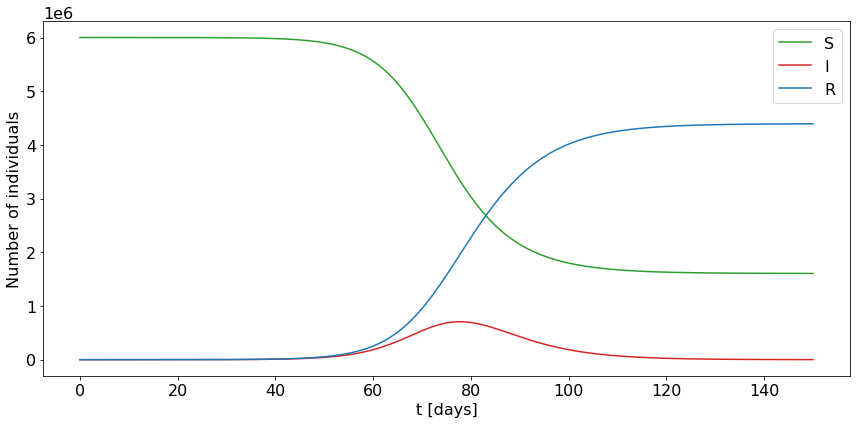

In [42]:
# (a) SIR-modelling Denmark (naive)
I0 = 15
state_init = np.array([N-I0, I0, 0])
num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol

clr = [f"tab:{c}" for c in ["green", "red", "blue"]]
lbl = ["S", "I", "R"]

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()

#for e in formats:
#    plt.savefig(savepath+"logistic_numerical_analytical."+e)
# plt.show()

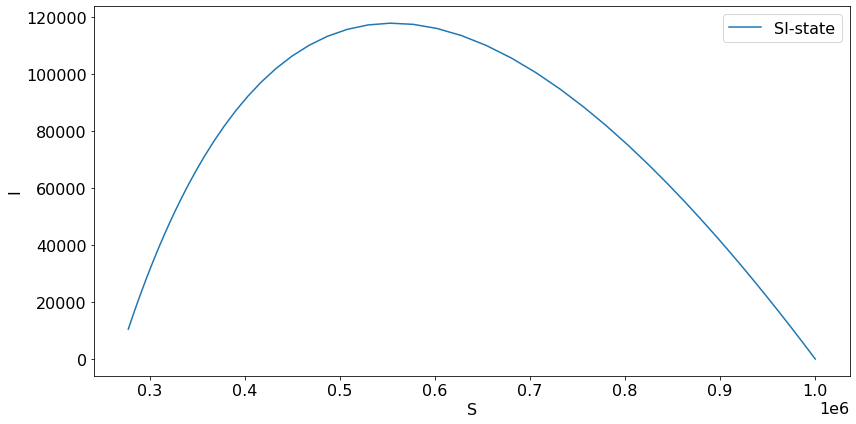

In [40]:
# (c) Phase space plotting:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
ax.plot(S, I, color=clr[i], label="SI-state")

ax.set_xlabel("S")
ax.set_ylabel("I")
# ax.set_yscale("log")
ax.legend()